In [1]:
#Load Data https://www.kaggle.com/datasets/ander289386/cars-germany

In [2]:
import numpy as np
import pandas as pd
import os
 
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
GCARS_PATH = '../../data/'

In [4]:
def load_german_cars(gcars_path=GCARS_PATH):
  csv_path = os.path.join(gcars_path, 'autoscout24-germany-dataset.csv')
  return pd.read_csv(csv_path)

df_cars = load_german_cars()

# Length

In [5]:
len(df_cars)

46405

# Format of data

In [6]:
df_cars.head()

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011


<AxesSubplot:xlabel='mileage', ylabel='Count'>

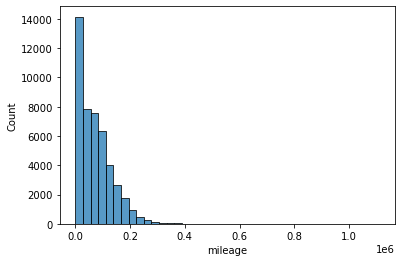

In [7]:
sns.histplot(df_cars.mileage, bins=40)

<AxesSubplot:xlabel='hp', ylabel='Count'>

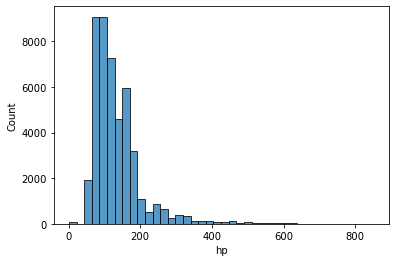

In [8]:
sns.histplot(df_cars.hp, bins=40)

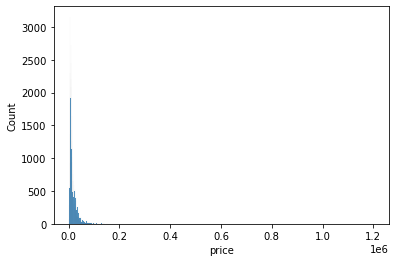

In [16]:
sns.histplot(df_cars.price);

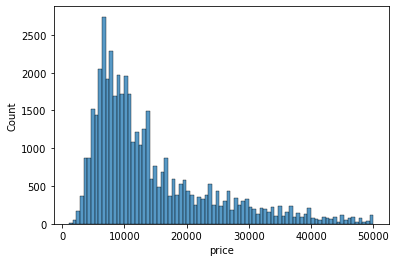

In [15]:
sns.histplot(df_cars.price[df_cars.price < 50000]);

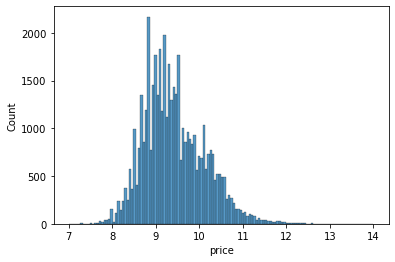

In [14]:
log_price = np.log1p(df_cars.price)
sns.histplot(log_price);

## check for null values

In [11]:
df_cars.isnull().sum()

mileage        0
make           0
model        143
fuel           0
gear         182
offerType      0
price          0
hp            29
year           0
dtype: int64

All cars has eg. mileage, price or year - but we have am isuue with model and gear, but we have information about 46k cars, so 182 is not big problem

## Validation framework

In [27]:
from sklearn.model_selection import train_test_split

n = len(df_cars)
 
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

#
train, test = train_test_split(df, test_size=0.2)
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
#


X_train, X_test, y_train, y_test 
    = train_test_split(X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val 
    = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

In [28]:
np.random.seed(2)
idx = np.arange(n)
np.random.shuffle(idx)

In [29]:
df_shuffled = df_cars.iloc[idx]

In [30]:
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [25]:
y_train = np.log1p(df_train.price.values)
y_val = np.log1p(df_val.price.values)
y_test = np.log1p(df_test.price.values)

In [26]:
del df_train['price']
del df_val['price']
del df_test['price']

In [31]:
a = [0,1,2,3,4,5,6,7,8,9]

In [33]:
df = pd.DataFrame(a)

In [36]:
df.iloc[8:]

,0
8,8
9,9
